# DS-SF-23 | Codealong 05 | Inferential Statistics for Model Fit

## Inferential Statistics | Motivating Example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05-start.csv'), index_col = 'ID')

We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

In [4]:
df

Address DateOfSale  SalePrice  \
ID                                                                             
15063471     55 Vandewater St APT 9, San Francisco, CA    12/4/15   710000.0   
15063505           740 Francisco St, San Francisco, CA   11/30/15  2150000.0   
15063609           819 Francisco St, San Francisco, CA   11/12/15  5600000.0   
15064044      199 Chestnut St APT 5, San Francisco, CA   12/11/15  1500000.0   
15064257    111 Chestnut St APT 403, San Francisco, CA    1/15/16   970000.0   
...                                                ...        ...        ...   
2124214951       412 Green St APT A, San Francisco, CA    1/15/16   390000.0   
2126960082     355 1st St UNIT 1905, San Francisco, CA   11/20/15   860000.0   
2128308939        33 Santa Cruz Ave, San Francisco, CA   12/10/15   830000.0   
2131957929           1821 Grant Ave, San Francisco, CA   12/15/15   835000.0   
2136213970            1200 Gough St, San Francisco, CA    1/10/16   825000.0   

            IsAStudio  BedCount    ...       Size  LotSize  BuiltInYear  \
ID                                 ...                                    
15063471          0.0       1.0    ...      550.0      NaN       1980.0   
15063505          0.0       NaN    ...     1430.0   2435.0       1948.0   
15063609          0.0       2.0    ...     2040.0   3920.0       1976.0   
15064044          0.0       1.0    ...     1060.0      NaN       1930.0   
15064257          0.0       2.0    ...     1299.0      NaN       1993.0   
...               ...       ...    ...        ...      ...          ...   
2124214951        1.0       NaN    ...      264.0      NaN       2012.0   
2126960082        0.0       1.0    ...      691.0      NaN       2004.0   
2128308939        0.0       3.0    ...     1738.0   2299.0       1976.0   
2131957929        0.0       2.0    ...     1048.0      NaN       1975.0   
2136213970        0.0       1.0    ...      900.0      NaN       1966.0   

                  M1        M2  
ID                              
15063471    1.099658  0.097627  
15063505    3.687657  0.430379  
15063609    8.975475  0.205527  
15064044    2.317325  0.089766  
15064257    1.380945 -0.152690  
...              ...       ...  
2124214951  0.428094 -0.804647  
2126960082  1.302833  0.029844  
2128308939  1.608882  0.876824  
2131957929  1.025920 -0.542707  
2136213970  1.383641  0.354282  

[1000 rows x 11 columns]

In [10]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'BedCount',
       u'BathCount', u'Size', u'LotSize', u'BuiltInYear', u'M1', u'M2'],
      dtype='object')

### Exploratory Analysis on `M1` and `M2` and how they relate to `SalePrice`

In [12]:
df.describe()

SalePrice   IsAStudio    BedCount   BathCount          Size  \
count  1.000000e+03  986.000000  836.000000  942.000000    967.000000   
mean   1.397423e+06    0.029412    2.572967    1.977548   1641.300931   
std    1.736413e+06    0.169043    1.250891    1.130334   1027.016175   
min    1.000000e+00    0.000000    1.000000    1.000000    264.000000   
25%    8.000000e+05    0.000000    2.000000    1.000000   1027.500000   
50%    1.100000e+06    0.000000    2.000000    2.000000   1350.000000   
75%    1.532500e+06    0.000000    3.000000    2.000000   1947.500000   
max    3.270000e+07    1.000000    9.000000   14.000000  11500.000000   

            LotSize  BuiltInYear           M1           M2  
count    556.000000   975.000000  1000.000000  1000.000000  
mean    3020.640288  1947.533333     2.101532    -0.008157  
std     2853.430139    38.021563     2.803823     0.581489  
min       44.000000  1870.000000     0.000002    -0.998908  
25%     2375.000000  1912.000000     1.140770    -0.504773  
50%     2622.000000  1939.000000     1.595360    -0.037355  
75%     3049.000000  1986.000000     2.340724     0.474521  
max    47916.000000  2015.000000    61.532746     0.999617

In [16]:
df.M1.count()

1000

In [18]:
df.M2.count()

1000

In [21]:
(df.M1 == np.nan).sum()

0

In [43]:
(df.M2 == np.nan).sum()

0

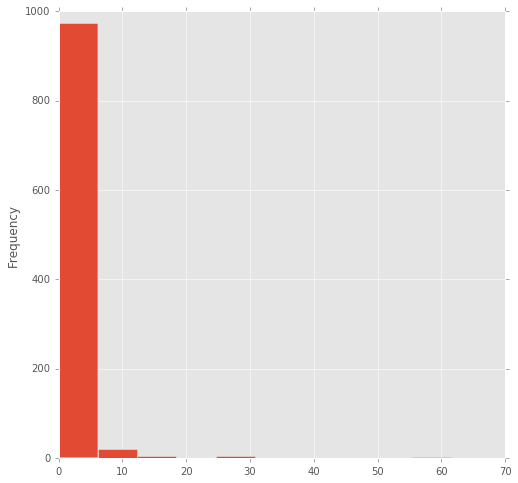

In [51]:
df['M1'].plot(kind = 'hist', figsize = (8, 8))

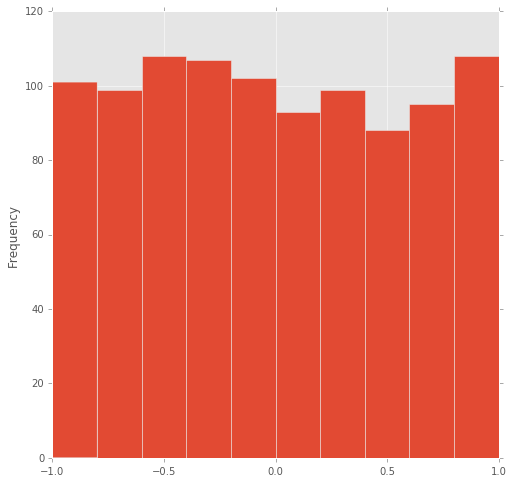

In [47]:
df['M2'].plot(kind = 'hist', figsize = (8, 8))

In [64]:
df.corr()

SalePrice  IsAStudio  BedCount  BathCount      Size   LotSize  \
SalePrice     1.000000   0.008889  0.379453   0.369938  0.485379  0.392418   
IsAStudio     0.008889   1.000000       NaN  -0.078195  0.052166 -0.012622   
BedCount      0.379453        NaN  1.000000   0.715194  0.722656  0.070542   
BathCount     0.369938  -0.078195  0.715194   1.000000  0.692501  0.108556   
Size          0.485379   0.052166  0.722656   0.692501  1.000000  0.201979   
LotSize       0.392418  -0.012622  0.070542   0.108556  0.201979  1.000000   
BuiltInYear  -0.148598  -0.050258 -0.344700  -0.078157 -0.313989  0.046411   
M1            0.970612   0.004113  0.370483   0.323544  0.434626  0.290286   
M2            0.022003  -0.043870  0.001504  -0.004046  0.015807  0.005383   

             BuiltInYear        M1        M2  
SalePrice      -0.148598  0.970612  0.022003  
IsAStudio      -0.050258  0.004113 -0.043870  
BedCount       -0.344700  0.370483  0.001504  
BathCount      -0.078157  0.323544 -0.004046  
Size           -0.313989  0.434626  0.015807  
LotSize         0.046411  0.290286  0.005383  
BuiltInYear     1.000000 -0.146299 -0.022441  
M1             -0.146299  1.000000  0.166624  
M2             -0.022441  0.166624  1.000000

In [68]:
df[['SalePrice', 'Size', 'M1', 'M2']].corr()

SalePrice      Size        M1        M2
SalePrice   1.000000  0.485379  0.970612  0.022003
Size        0.485379  1.000000  0.434626  0.015807
M1          0.970612  0.434626  1.000000  0.166624
M2          0.022003  0.015807  0.166624  1.000000

In [71]:
df_corr = df[['SalePrice', 'Size', 'M1', 'M2']].corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12172cf50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12192e8d0>]], dtype=object)

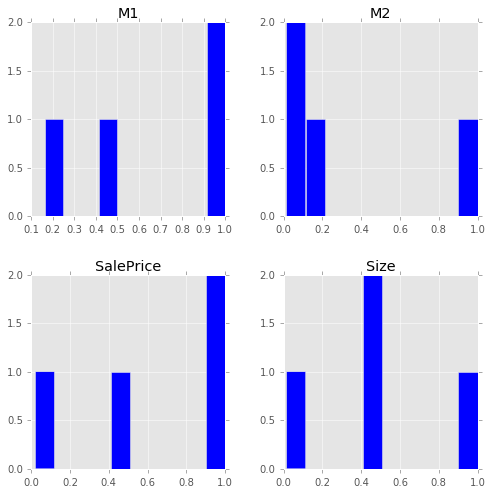

In [74]:
df_corr.hist(  
              figsize=(8,8),         
              color="blue",
         )   

### Can see that there is a higher correlation between SalePrice & M1:

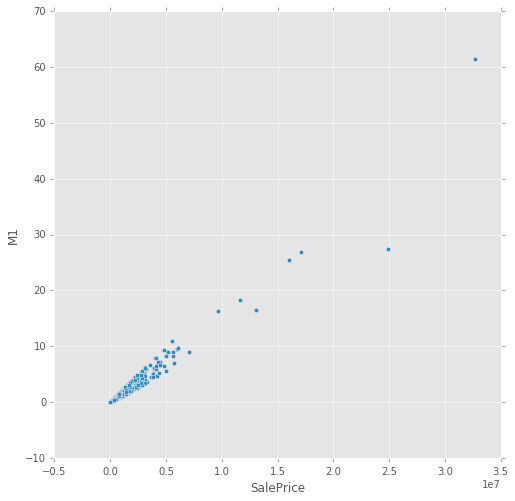

In [61]:
df.plot(kind = 'scatter', x = 'SalePrice', y = 'M1', figsize = (8, 8))

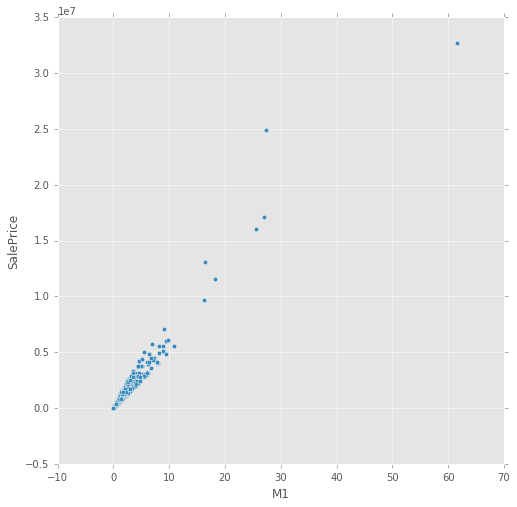

In [63]:
df.plot(kind = 'scatter', x = 'M1', y = 'SalePrice', figsize = (8, 8))

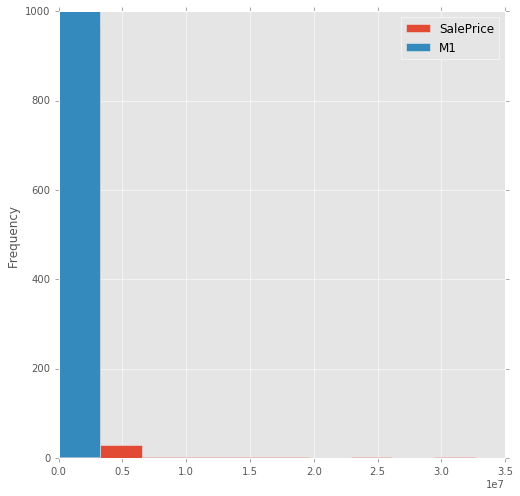

In [84]:
df[ ['SalePrice', 'M1'] ].plot(kind = 'hist', figsize = (8, 8))

### Look at correlation between SalePrice and M2:

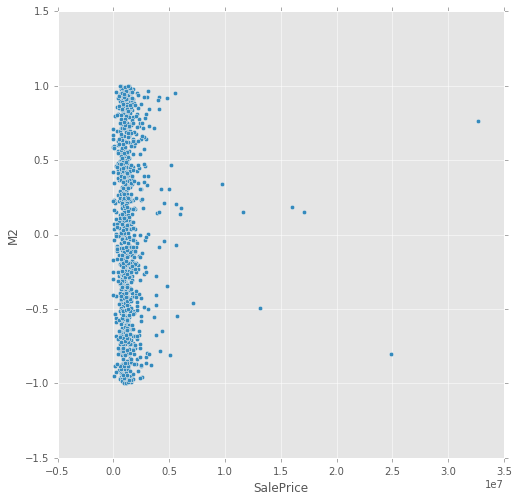

In [86]:
df.plot(kind = 'scatter', x = 'SalePrice', y = 'M2', figsize = (8, 8))

In [87]:
df.plot(kind = 'scatter', x = 'M2', y = 'SalePrice', figsize = (8, 8))

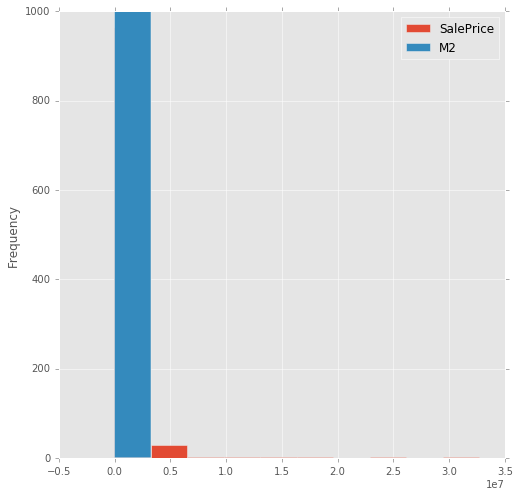

In [88]:
df[ ['SalePrice', 'M2'] ].plot(kind = 'hist', figsize = (8, 8))

### Can see there is a small correlation between size and m1:

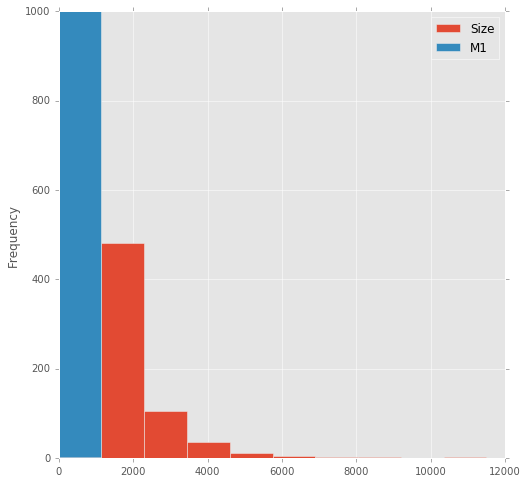

In [55]:
df[ ['Size', 'M1'] ].plot(kind = 'hist', figsize = (8, 8))

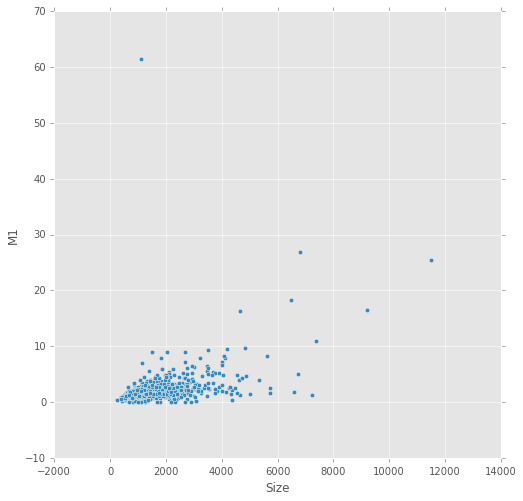

In [58]:
df.plot(kind = 'scatter', x = 'Size', y = 'M1', figsize = (8, 8))

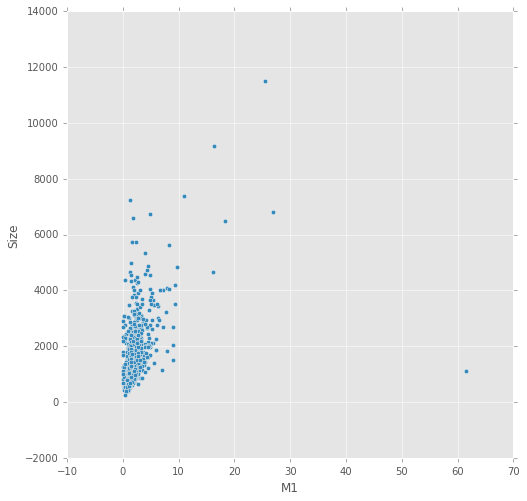

In [59]:
df.plot(kind = 'scatter', x = 'M1', y = 'Size', figsize = (8, 8))

### Scatter Plot with M1, SalesPrice, M2:

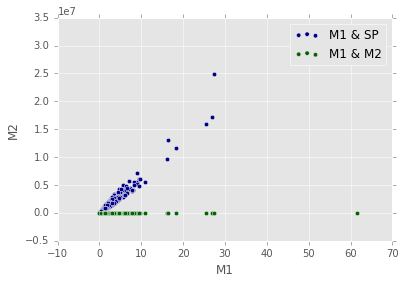

In [79]:
ax = df.plot(kind = 'scatter', x = 'M1', y = 'SalePrice',
            color = 'DarkBlue', label = 'M1 & SP');
df.plot(kind = 'scatter', x = 'M1', y = 'M2',
       color = 'DarkGreen', label = 'M1 & M2', ax=ax)

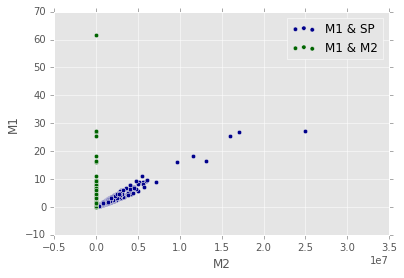

In [83]:
ax = df.plot(kind = 'scatter', x = 'SalePrice', y = 'M1',
            color = 'DarkBlue', label = 'M1 & SP');
df.plot(kind = 'scatter', x = 'M2', y = 'M1',
       color = 'DarkGreen', label = 'M1 & M2', ax=ax)

### Look at correlation between M1 & M2:

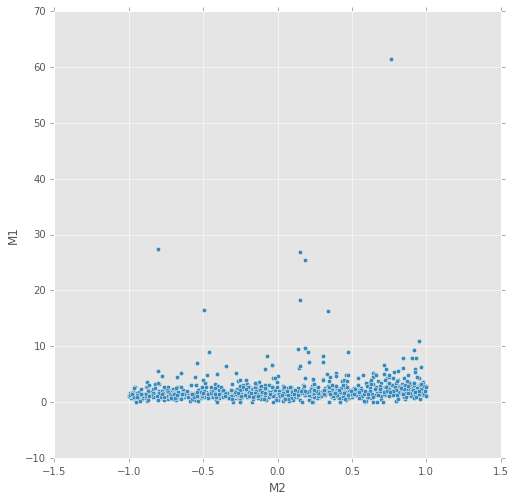

In [77]:
df.plot(kind = 'scatter', x = 'M2', y = 'M1', figsize = (8, 8))

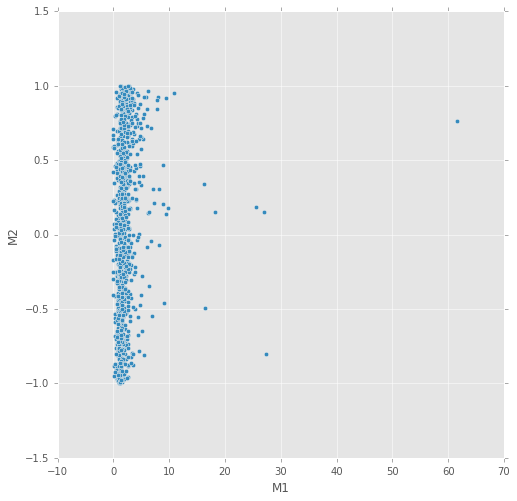

In [78]:
df.plot(kind = 'scatter', x = 'M1', y = 'M2', figsize = (8, 8))

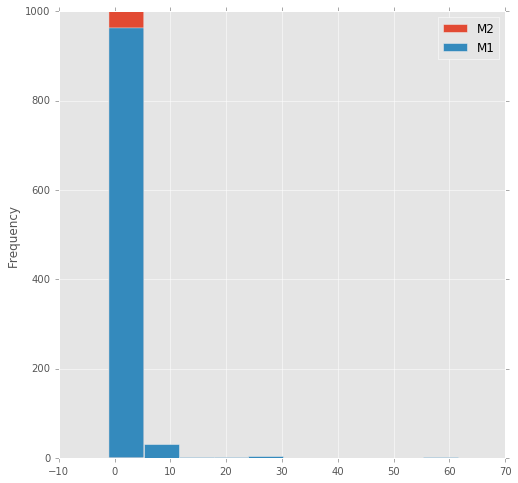

In [32]:
df[ ['M2', 'M1'] ].plot(kind = 'hist', figsize = (8, 8))

## Your first Machine Learning Models!

### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [89]:
X = df[ ['M1'] ]
#x = variable use to predict (a DATAFRAME)
#salesprice = ? * M1
#? = coefficient

y = df.SalePrice
#y = variable you want to predict (a SERIES)

model = smf.OLS(y, X).fit()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Thu, 19 May 2016   Prob (F-statistic):              0.792
Time:                        20:29:03   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look at: 
1. t
2. P>|t|
3. [95.0% Conf. Int.] – confidence interval 
4. coef
5. std error

### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [92]:
X = df[ ['M2'] ]
#x = variable use to predict (a DATAFRAME)
#salesprice = ? * M2

y = df.SalePrice
#y = variable you want to predict (a SERIES)

model = smf.OLS(y, X).fit()

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Thu, 19 May 2016   Prob (F-statistic):              0.792
Time:                        20:22:29   Log-Likelihood:                -16036.
No. Observations:                1000   AIC:                         3.207e+04
Df Residuals:                     999   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M2          3.195e+04   1.21e+05      0.263      0.792     -2.06e+05   2.7e+05
==============================================================================
Omnibus:                     1664.600   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           986904.813
Skew:                          10.532   Prob(JB):                         0.00
Kurtosis:                     155.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""